In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,roc_auc_score

In [5]:
import pandas as pd,numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn import over_sampling
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
len(data.columns)

31

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: >

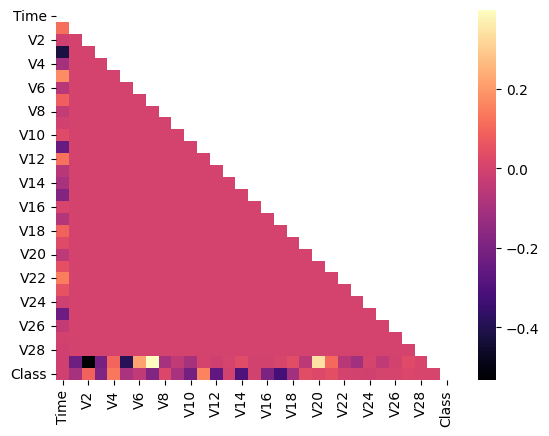

In [9]:
sns.heatmap(data.corr(),cmap="magma",mask = np.triu(data.corr()))

In [10]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: >

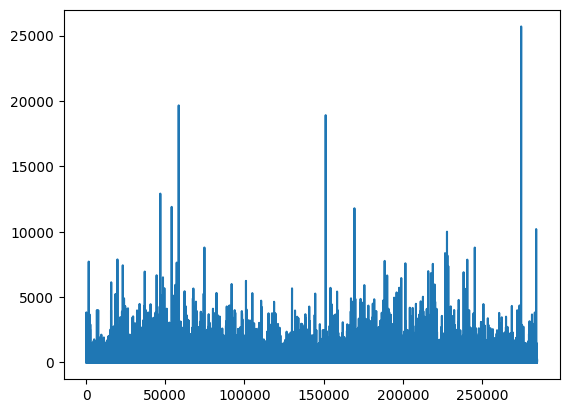

In [11]:
data["Amount"].plot()

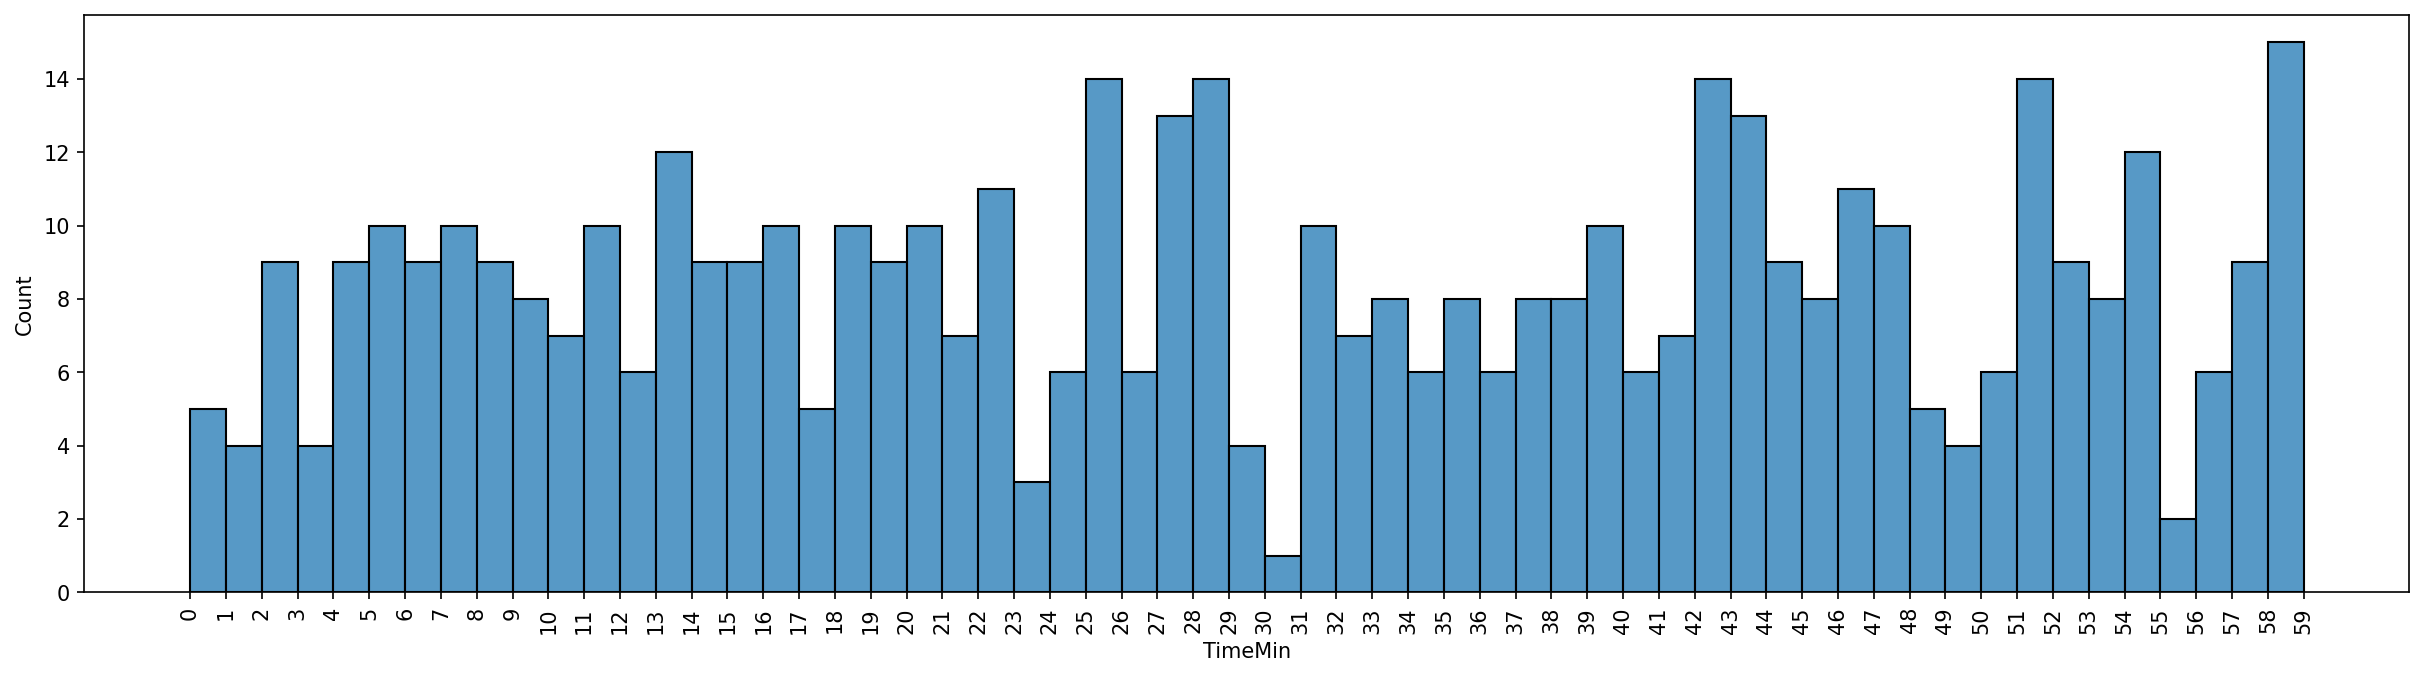

In [12]:
data['TimeMin'] = data['Time'] % 60
data['TimeHour'] = (data['Time'] / 60**2)%24

plt.figure(figsize=(20, 5), dpi=150)
sns.histplot(data[data.Class==1].TimeMin,binwidth=1)
plt.xticks(range(0, 60), range(0, 60), rotation=90)
plt.show(block=False)

In [13]:
print(data["TimeHour"])

0          0.000000
1          0.000000
2          0.000278
3          0.000278
4          0.000556
            ...    
284802    23.996111
284803    23.996389
284804    23.996667
284805    23.996667
284806    23.997778
Name: TimeHour, Length: 284807, dtype: float64


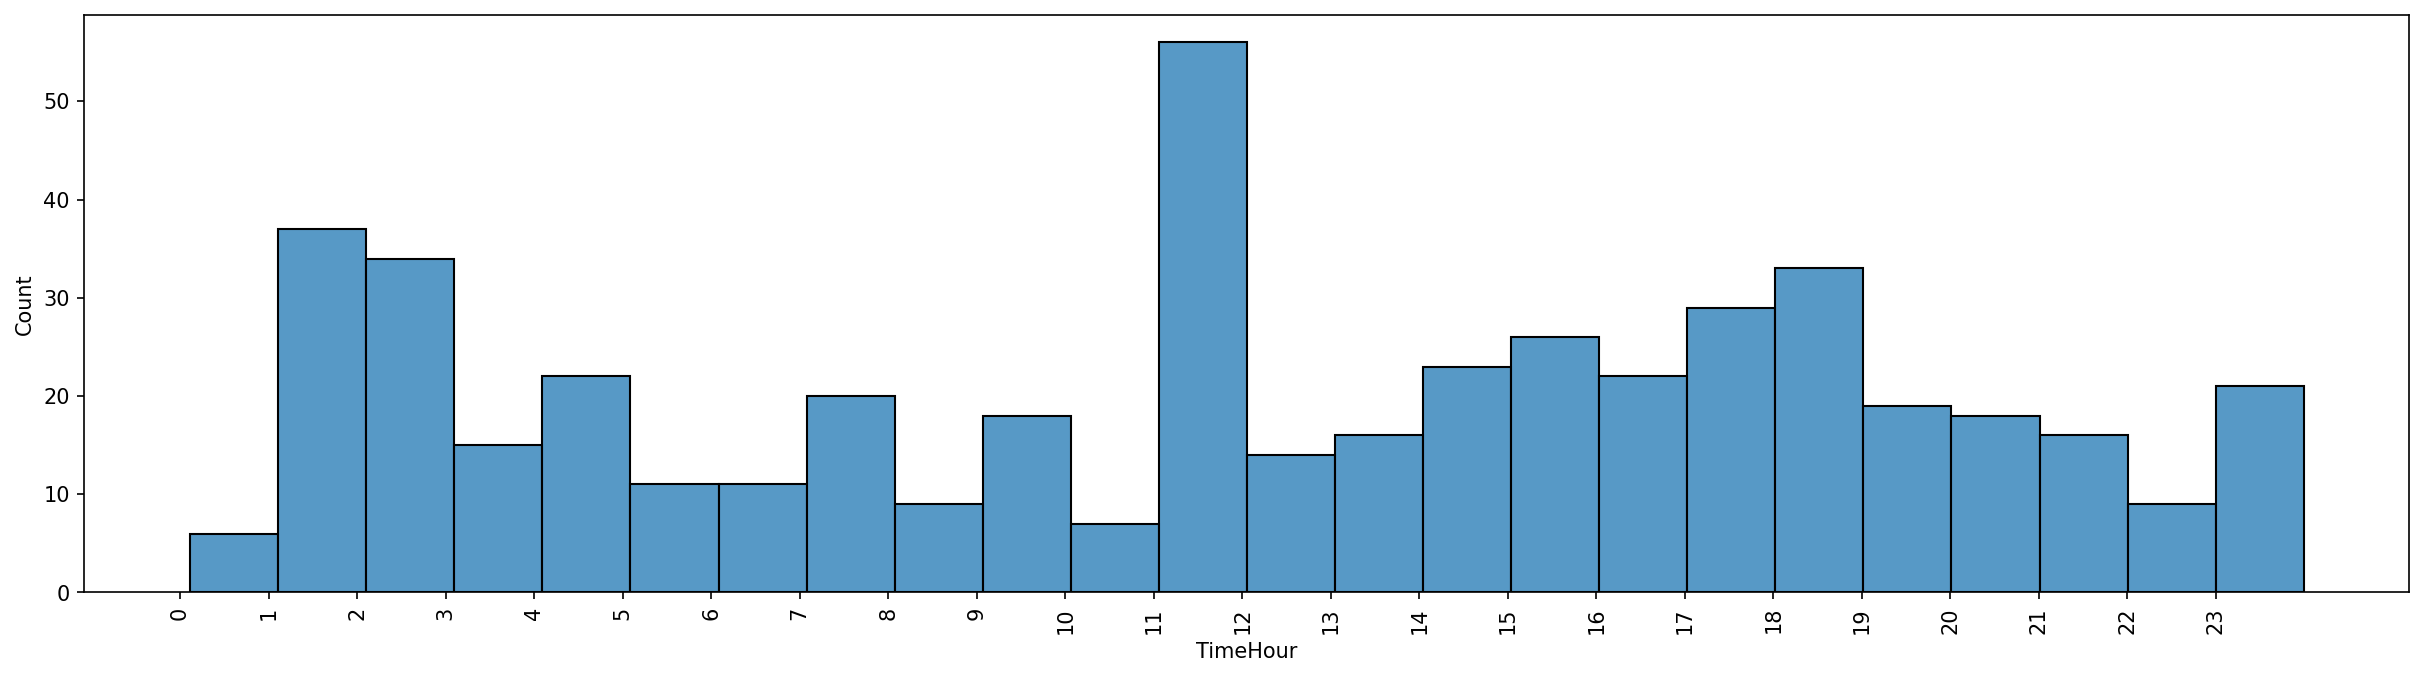

In [14]:
plt.figure(figsize=(20, 5), dpi=150)
sns.histplot(data[data.Class==1].TimeHour,binwidth=1)
plt.xticks(range(0, 24), range(0, 24), rotation=90)
plt.show(block=False)

Class imblance

In [15]:
number_of_features=len(data.columns)-1
number_of_features

32

In [16]:
import torch
from torch import nn
from torch.utils.data import DataLoader,TensorDataset
from torch.nn import BCELoss
from torch.optim import Adam

In [17]:
class nn_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.pipeline=nn.Sequential(
            nn.Linear(number_of_features,15),
            nn.ReLU(),
            nn.Linear(15,7),
            nn.ReLU(),
            nn.Linear(7,3),
            nn.ReLU(),
            nn.Linear(3,1),
            nn.Sigmoid()
        )
    
    def forward(self,x):
        return self.pipeline(x)

In [18]:
scaler = MinMaxScaler()
X_preprocessed = scaler.fit_transform(data.drop(columns=["Class"]))
print(X_preprocessed.shape)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, data["Class"], test_size=0.33, random_state=42)

(284807, 32)


In [19]:
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)


In [20]:
model = LogisticRegression()
model.fit(X_train,y_train)
print(classification_report(y_test,model.predict(X_test)))
print(roc_auc_score(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.85      0.49      0.62       149

    accuracy                           1.00     93987
   macro avg       0.92      0.74      0.81     93987
weighted avg       1.00      1.00      1.00     93987

0.7448971746395437


In [21]:
epochs = 20


train_dataset = TensorDataset(torch.tensor(np.array(X_train)).float(),torch.tensor(np.array(y_train)).float())
test_dataset = TensorDataset(torch.tensor(np.array(X_test)).float(),torch.tensor(np.array(y_test)).float())
train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=64,shuffle=False)

loss_fn = BCELoss()
nnmodel = nn_model().to("cuda")
print(nnmodel.parameters())
optim = Adam(nnmodel.parameters(),lr=0.001)

for epoch in range(1,epochs+1):
    print("Epoch: ",epoch)
    total_loss=[]
    for x,y in train_loader:
        x,y=x.to("cuda"),y.to("cuda")
        preds = nnmodel(x)
        #print(preds,y)
        loss = loss_fn(preds,y.unsqueeze(-1))
        loss.backward()
        total_loss.append(loss.item())
        optim.step()
        optim.zero_grad()
    print("train_loss: ",sum(total_loss)/len(total_loss))
    total_loss=[]
    for x,y in test_loader:
        x,y=x.to("cuda"),y.to("cuda")
        preds = nnmodel(x)
        loss = loss_fn(preds,y.unsqueeze(-1))
        total_loss.append(loss.item())
    print("test loss: ",sum(total_loss)/len(total_loss))
        
    
        


<generator object Module.parameters at 0x7e583edef920>
Epoch:  1
train_loss:  0.03628757721265855
test loss:  0.010748148883595921
Epoch:  2
train_loss:  0.01150101943985927
test loss:  0.009410236593834496
Epoch:  3
train_loss:  0.008844866446989006
test loss:  0.00574534214759094
Epoch:  4
train_loss:  0.004979129772442353
test loss:  0.003389274204234479
Epoch:  5
train_loss:  0.004065699360572226
test loss:  0.003211750898923417
Epoch:  6
train_loss:  0.0038583864892940216
test loss:  0.0034055109810095653
Epoch:  7
train_loss:  0.003816995909669577
test loss:  0.0029267447013992002
Epoch:  8
train_loss:  0.0037252379770592505
test loss:  0.002935209156882504
Epoch:  9
train_loss:  0.0036914907471447917
test loss:  0.0030354616600932567
Epoch:  10
train_loss:  0.0036465462231799277
test loss:  0.003229407253455646
Epoch:  11
train_loss:  0.003640263810367006
test loss:  0.002903202833034275
Epoch:  12
train_loss:  0.0035427073676088444
test loss:  0.0031607432455232416
Epoch:  13
t

In [22]:
print(classification_report(y_test,nnmodel(torch.tensor(X_test).float().to("cuda")).cpu().detach().numpy()>0.5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.83      0.78      0.81       149

    accuracy                           1.00     93987
   macro avg       0.92      0.89      0.90     93987
weighted avg       1.00      1.00      1.00     93987



In [23]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"  # Necessary to avoid warnings
)
xgb_model.fit(X_train_adasyn, y_train_adasyn)

xgb_preds = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

print("\nXGBoost Results:")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_proba))
print(classification_report(y_test, xgb_preds))



XGBoost Results:
Accuracy: 0.9957972911147286
ROC-AUC Score: 0.9859539809504628
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.26      0.89      0.40       149

    accuracy                           1.00     93987
   macro avg       0.63      0.94      0.70     93987
weighted avg       1.00      1.00      1.00     93987




Random Forest Results:
Accuracy: 0.9897964612127209
ROC-AUC Score: 0.9839857523983574
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     93838
           1       0.12      0.90      0.22       149

    accuracy                           0.99     93987
   macro avg       0.56      0.94      0.61     93987
weighted avg       1.00      0.99      0.99     93987



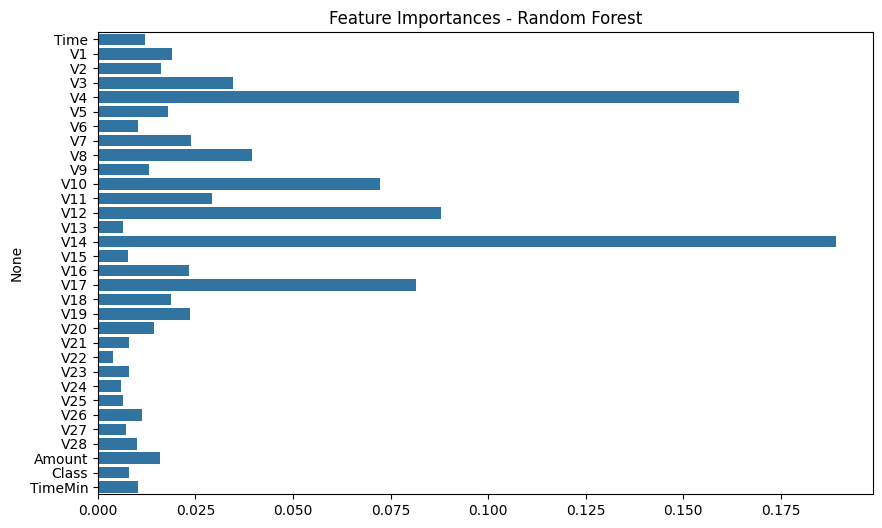

In [24]:

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_adasyn, y_train_adasyn)


rf_preds = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_proba))
print(classification_report(y_test, rf_preds))




feature_importances = rf_model.feature_importances_
feature_names = data.columns[:-1]  


plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importances - Random Forest")
plt.show()

In [25]:
from imblearn import over_sampling
SMOTE = over_sampling.SMOTE()
X_train_smote, y_train_smote = SMOTE.fit_resample(X_train, y_train)

In [26]:
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric="logloss"
)
model.fit(X_train_smote, y_train_smote)

xgb_preds = model.predict(X_test)
xgb_proba = model.predict_proba(X_test)[:, 1]

print("\nXGBoost Results:")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_proba))
print(classification_report(y_test, xgb_preds))


XGBoost Results:
Accuracy: 0.9972123804355921
ROC-AUC Score: 0.9885480918063703
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.35      0.89      0.50       149

    accuracy                           1.00     93987
   macro avg       0.67      0.94      0.75     93987
weighted avg       1.00      1.00      1.00     93987




Random Forest Results:
Accuracy: 0.9973294178982199
ROC-AUC Score: 0.9864690411048257
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.36      0.90      0.52       149

    accuracy                           1.00     93987
   macro avg       0.68      0.95      0.76     93987
weighted avg       1.00      1.00      1.00     93987



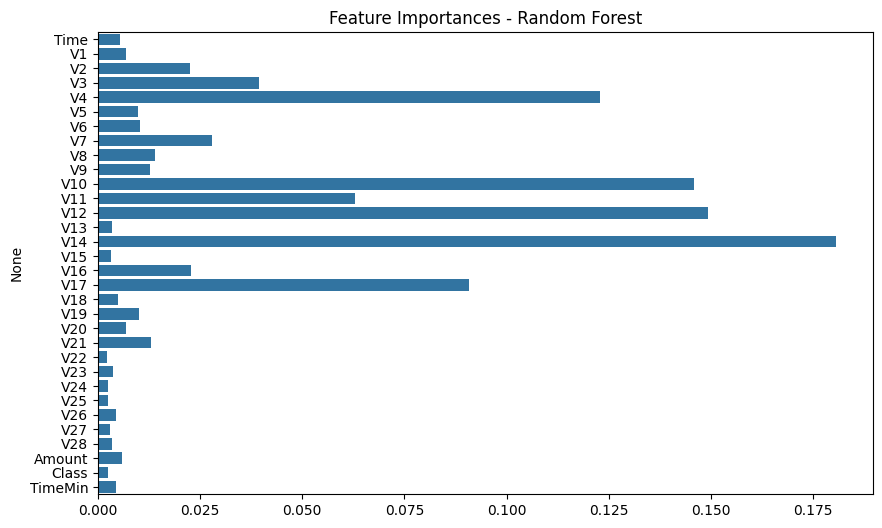

In [28]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    n_jobs=-1
)
model.fit(X_train_smote, y_train_smote)


rf_preds = model.predict(X_test)
rf_proba = model.predict_proba(X_test)[:, 1]

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_proba))
print(classification_report(y_test, rf_preds))

feature_importances = model.feature_importances_
feature_names = data.columns[:-1]  


plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importances - Random Forest")
plt.show()